# PCA

- Unsupervised model
- Try to write each data point as a weighted sum of some components
- It rotates the dataset in a way such that the rotated features are statiscally uncorrelated
- The first step is to find the direction of maximum variance (labeled Component 1). The second step is to find the second most information being orthogonal
- The aim is to retain only the principal components
- Used to remove noise effects from the data
- For the m indepedent variables of your dataset, PCA extracts p<= m new independent variables that explain the most the variance of the datatset, regardless of the dependent variable

Dealing with data interpretation and providing a more reliable model
- Feature Selection : Backward Elimination, Forward Selection, Bidirectional Elimination, Score Comparison
- Feature Extraction: PCA, LDA, Kernel PCA

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import mglearn

C:\Users\fabio\Anaconda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\fabio\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


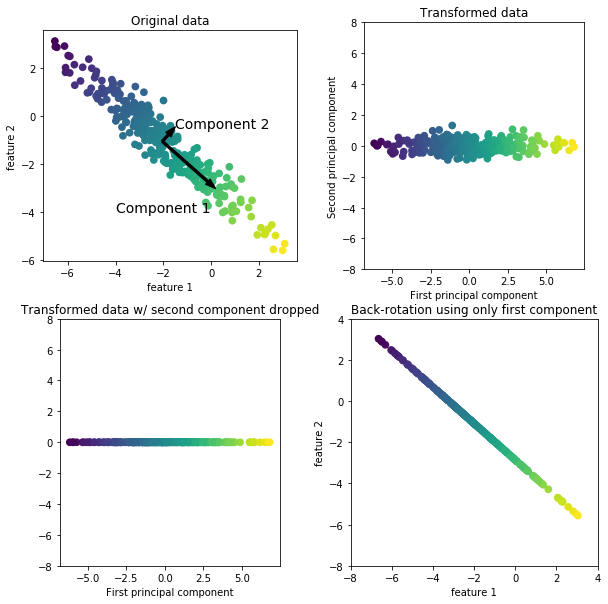

In [3]:
mglearn.plots.plot_pca_illustration()

# Case I - Cancer Breast Dataset

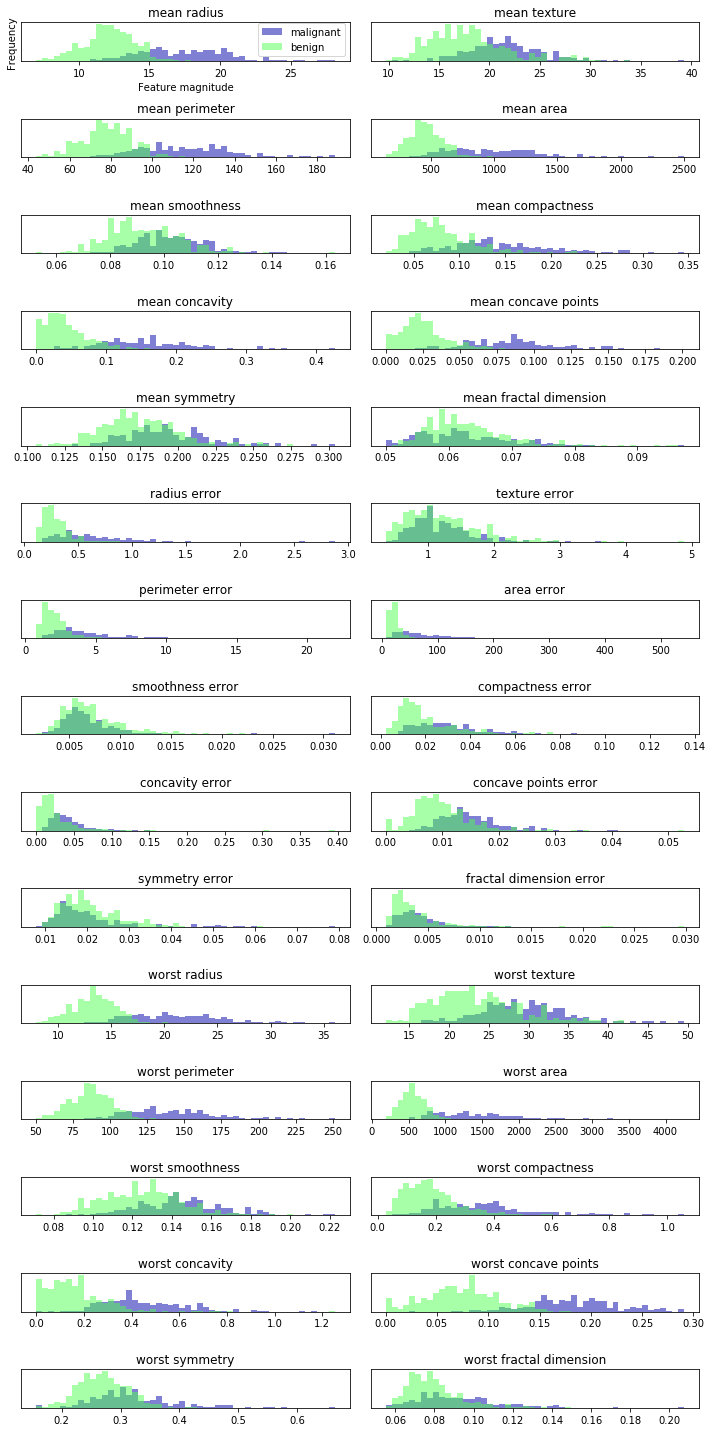

In [7]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10, 20)) 
malignant = cancer.data[cancer.target == 0] 
benign = cancer.data[cancer.target == 1] 
ax = axes.ravel() 

for i in range(30): 
    _, bins = np.histogram(cancer.data[:, i], bins=50) 
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0 ), alpha=.5) 
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5) 
    ax[i].set_title(cancer.feature_names[i]) 
    ax[i].set_yticks(()) 
    ax[0].set_xlabel("Feature magnitude") 
    ax[0].set_ylabel("Frequency") 
    ax[0].legend(["malignant", "benign"], loc="best") 
    fig.tight_layout() 

In [18]:
# Splitting training and testing
from sklearn.model_selection import train_test_split as tts
X,y = cancer.data, cancer.target
X_train, X_test, y_train, y_test= tts(X,y, test_size=0.2, random_state=0)

In [19]:
from sklearn.preprocessing import StandardScaler
# Fitting to the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
#Applying PCA
from sklearn.decomposition import PCA
PCA=PCA(n_components=2)
X_train = PCA.fit_transform(X_train)
X_test = PCA.transform(X_test)
explained_variance= PCA.explained_variance_ratio_

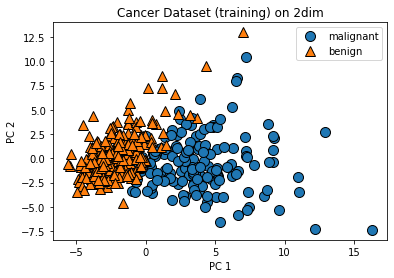

In [36]:
mglearn.discrete_scatter(X_train[:,0], X_train[:, 1], y_train )
plt.title('Cancer Dataset (training) on 2dim')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(cancer.target_names, loc='best')

Reduced the 30 variables into 2 main components (using the variance as guide).Even a linear classifier could do a good job classifing this data. 

Note: malignant are more spread than bening.

In [43]:
#Visualizing the components
PCA.components_

array([[ 0.22151036,  0.10450507,  0.22951189,  0.22365223,  0.13994442,
         0.24178096,  0.25999119,  0.26333456,  0.13270016,  0.05850358,
         0.20695134,  0.01284976,  0.21007605,  0.20308114,  0.0158805 ,
         0.16511631,  0.14173528,  0.18073348,  0.03361713,  0.10290725,
         0.230248  ,  0.10553057,  0.23748257,  0.22734321,  0.12954467,
         0.20947161,  0.22958661,  0.25309767,  0.11974113,  0.13016752],
       [-0.22849614, -0.05304083, -0.21198379, -0.22578551,  0.17747368,
         0.14778482,  0.0637919 , -0.03408058,  0.19056224,  0.36115407,
        -0.10875906,  0.10096927, -0.10092794, -0.15143581,  0.20845567,
         0.23829333,  0.20962214,  0.14429893,  0.1829677 ,  0.28060436,
        -0.21506139, -0.03435232, -0.19941942, -0.21424804,  0.17169435,
         0.14470833,  0.10648885, -0.00189422,  0.1442728 ,  0.27514824]])

Text(0, 0.5, 'Principal Components')

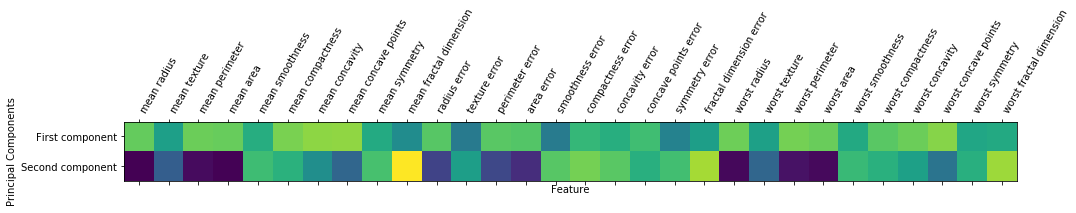

In [54]:
plt.matshow(PCA.components_, cmap = 'viridis')
plt.yticks([0,1],['First component', 'Second component'])
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation =60, ha= 'left')
plt.xlabel('Feature')
plt.ylabel('Principal Components')

(-1, 30)

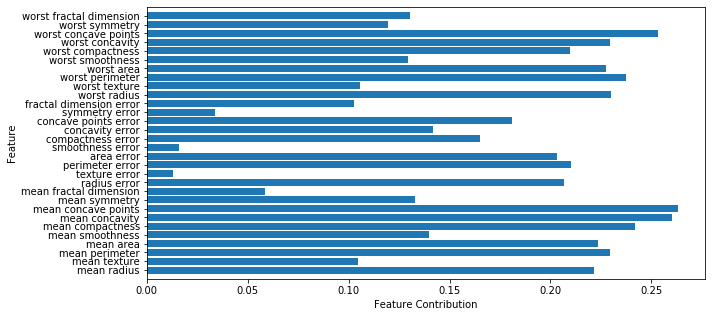

In [69]:
from matplotlib.pyplot import figure

fig = figure(figsize=(10,5))
n_features=cancer.data.shape[1]
array_i=np.arange(n_features)

plt.barh(array_i, PCA.components_[0], align='center')
plt.yticks(array_i, cancer.feature_names)
plt.xlabel('Feature Contribution')
plt.ylabel('Feature')
plt.ylim(-1,n_features)

(-1, 30)

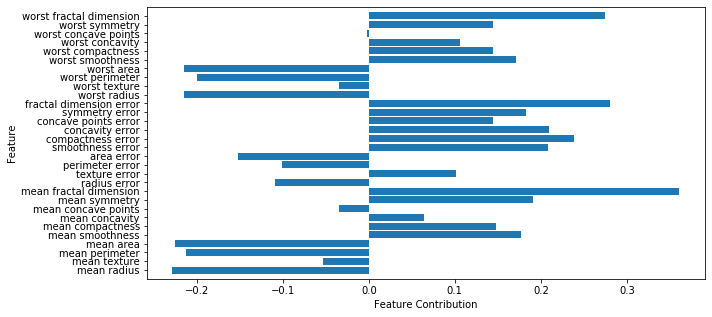

In [71]:
from matplotlib.pyplot import figure

fig = figure(figsize=(10,5))
n_features=cancer.data.shape[1]
array_i=np.arange(n_features)
plt.barh(array_i, PCA.components_[1], align='center')
plt.yticks(array_i, cancer.feature_names)
plt.xlabel('Feature Contribution')
plt.ylabel('Feature')
plt.ylim(-1,n_features)

In [41]:
###(Just applying a simple Logistic Regression to visualize the results)

In [37]:
from sklearn.linear_model import LogisticRegression

classifier= LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [39]:
#Visualizing the score result
print('Training set score:{:.3f}\nTest set score:{:.3f}'.format(classifier.score(X_train, y_train),
                                                                classifier.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix

df_confusion=pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['MODEL_1','MODEL_2'], 
                          index = ['DATA_1','DATA_2'])


from IPython.display import HTML
s  = '<script type="text/Javascript">'
s += 'var win = window.open("", "Title", "toolbar=no, location=no, directories=no, status=no, menubar=no, scrollbars=yes, resizable=yes, width=780, height=200, top="+(screen.height-400)+", left="+(screen.width-840));'
s += 'win.document.body.innerHTML = \'' + df_confusion.to_html().replace("\n",'\\') + '\';'
s += '</script>'

# Show in new Window
HTML(s)

Training set score:0.967
Test set score:0.921


# Case II - Optimization using PCA on the Logistic Regression Algorithm

In [5]:
dataset=pd.read_csv(r"../../Data Science/Cursos Online/Udemy/Machine-Learning-A-Z-New/Machine Learning A-Z New" \
                    "/Part 9 - Dimensionality Reduction/Section 43 - Principal Component Analysis (PCA)/Wine.csv")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

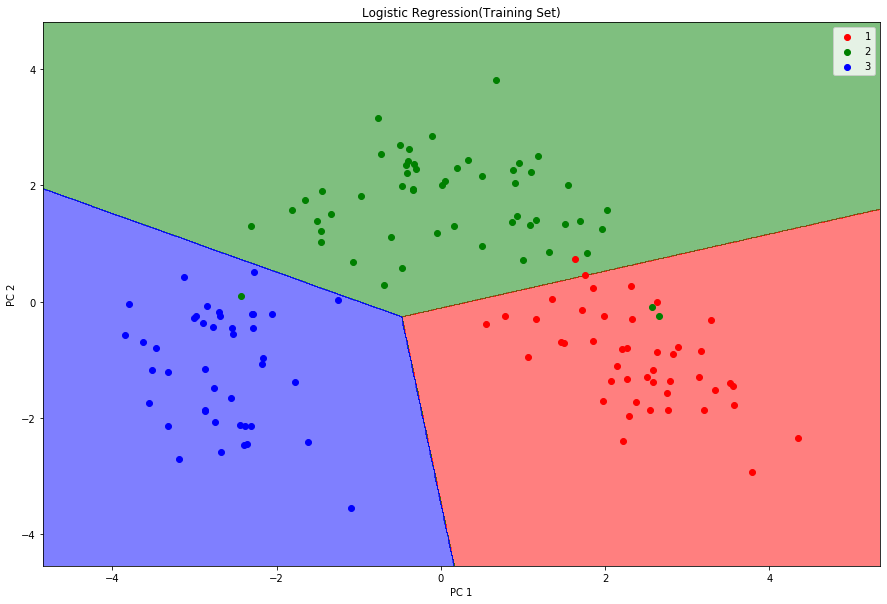

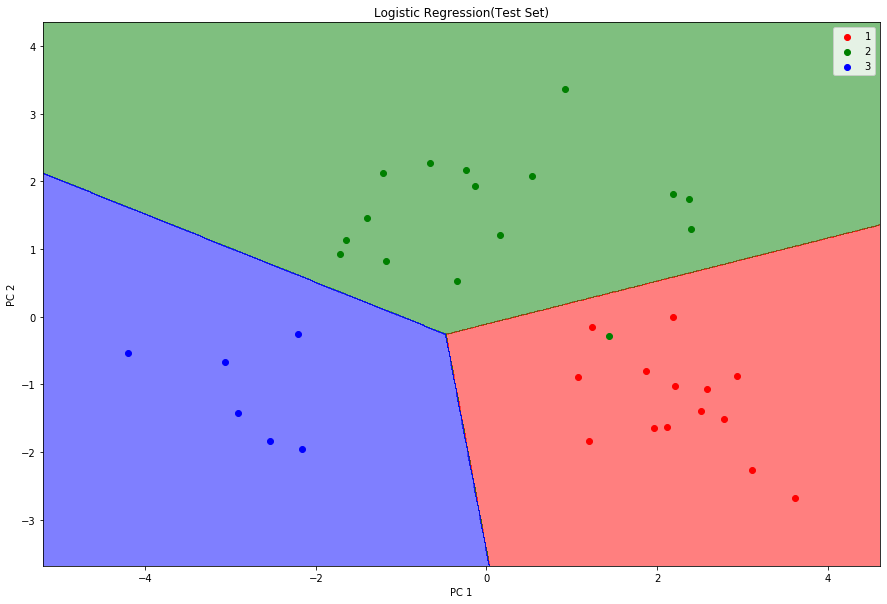

In [6]:
#Splitting data into X (features) and y (results)
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

# Splitting training and testing
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test= tts(X,y, test_size=0.2, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

#Applying PCA
from sklearn.decomposition import PCA
PCA=PCA(n_components=2)
X_train = PCA.fit_transform(X_train)
X_test= PCA.transform(X_test)
# explained_variance= PCA.explained_variance_ratio_


from sklearn.linear_model import LogisticRegression

classifier= LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Visualizing the decision boundary on the training set
from matplotlib.colors import ListedColormap

figure=plt.figure(figsize=(15,10))

X1, X2 = np.meshgrid(np.arange(start= X_train[:,0].min() -1, stop= X_train[:,0].max() +1, step = 0.01),
                     np.arange(start= X_train[:,1].min() -1, stop= X_train[:,1].max() +1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.5, 
                                                                                    cmap= ListedColormap(('red','green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train== j,0], X_train[y_train==j, 1],
               c=ListedColormap(('red','green','blue'))(i), label=j)
    
plt.title('Logistic Regression(Training Set)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')

# Visualizing the decision boundary on the test set
from matplotlib.colors import ListedColormap

figure=plt.figure(figsize=(15,10))

X1, X2 = np.meshgrid(np.arange(start= X_test[:,0].min() -1, stop= X_test[:,0].max() +1, step = 0.01),
                     np.arange(start= X_test[:,1].min() -1, stop= X_test[:,1].max() +1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.5, 
                                                                                    cmap= ListedColormap(('red','green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_test)):
    plt.scatter(X_test[y_test== j,0], X_test[y_test==j, 1],
               c=ListedColormap(('red','green','blue'))(i), label=j)
    
plt.title('Logistic Regression(Test Set)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')

In [10]:
# #Splitting data into X (features) and y (results)
# X=dataset.iloc[:,:-1].values
# y=dataset.iloc[:,-1].values

# # Splitting training and testing
# from sklearn.model_selection import train_test_split as tts
# X_train, X_test, y_train, y_test= tts(X,y, test_size=0.25, random_state=0)

# # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc_X=StandardScaler()
# X_train=sc_X.fit_transform(X_train)
# X_test=sc_X.transform(X_test)

# from sklearn.linear_model import LogisticRegression

# classifier= LogisticRegression()
# classifier.fit(X_train, y_train)
# y_pred = classifier.predict(X_test)

#Visualizing the score result
print('Training set score:{:.3f}\nTest set score:{:.3f}'.format(classifier.score(X_train, y_train),
                                                                classifier.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix

df_confusion=pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['MODEL_1','MODEL_2','MODEL_3'
                                                                      ], index = ['DATA_1','DATA_2','DATA_3'])


from IPython.display import HTML
s  = '<script type="text/Javascript">'
s += 'var win = window.open("", "Title", "toolbar=no, location=no, directories=no, status=no, menubar=no, scrollbars=yes, resizable=yes, width=780, height=200, top="+(screen.height-400)+", left="+(screen.width-840));'
s += 'win.document.body.innerHTML = \'' + df_confusion.to_html().replace("\n",'\\') + '\';'
s += '</script>'

# Show in new Window
HTML(s)

Training set score:0.965
Test set score:0.972


# Bonus : NMF

Non-negative Matrix Factorization
- work similary to the PCA - dimensionality reduction, but on the other hand it provides coefficients that are non-negative. It relies on keeping the interpretability of the original data.
- all components play an equal part (it tris to fin additive components)
- used in image processing - finding patterns within the data (not used to reconstruct or encode data)

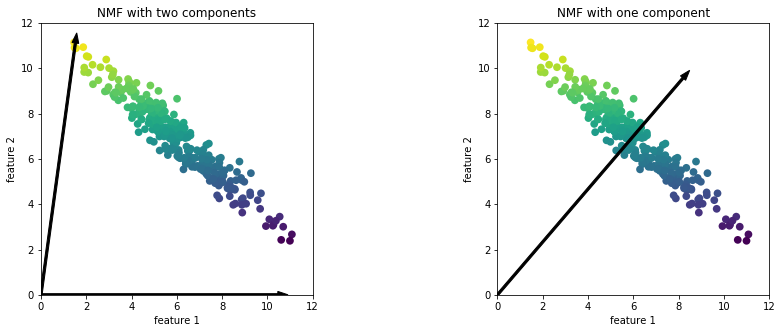

In [4]:
mglearn.plots.plot_nmf_illustration()